In [88]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv('./BankChurners.csv', sep=',')
df = data.copy()
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [110]:
# Limpeza de dados inicial: A fonte de onde retiramos a base de dados sugere ignorarmos as duas ultimas colunas.
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1,
        inplace=True
       )

In [111]:
list(df.columns)
# Attrition Flag é o que caracteriza se o cliente permanece ou não utilizando os serviços de cartão.

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [112]:
#A principio não há valores nulos ou nans mas podem haver outros tipos de erros
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [113]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [114]:
# buscando quais colunas contém valores numericos
list(df.select_dtypes(include=np.number))

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [115]:
# retornamos apenas os dados Numericos
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [116]:
# retornamos apenas os dados categoricos
# Income e Education são dados ordinais
# os demais são nominais
# Logo de cara notamos dentro da base de clientes que: 
# 1 Há mais clientes mulheres
# 2 Boa parte dos clientes tem um income abaixo de 40k
# 3 A vasta maioria dos cartões é Blue


df.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [117]:
# ajeitar algumas colunas para facilitar a legibilidade
df.columns = df.columns.str.replace('_', ' ')
df.head(5)

,CLIENTNUM,Attrition Flag,Customer Age,Gender,Dependent count,Education Level,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [119]:
df.rename(columns= {'CLIENTNUM': 'Client Number', 'Customer Age': 'Age',
                    'Attrition Flag': 'Acc status','Education Level':'Education',
                    'Income_Category':'Income', 'Dependent_count': 'Dependents'}, inplace=True)
df.head(2)

,Client Number,Acc status,Age,Gender,Dependent count,Education,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [18]:
# df.replace({'Education Level':{'Unknown': np.nan},
#                   'Marital Status':{'Unknown': np.nan},
#                   'Income ategory':{'Unknown': np.nan}
#                 }, inplace = True)

In [ ]:
# DADOS SOBRE O CLIENTE
# Age
# Gender
# Dependents
# Education - há valores uknown
# Marital status - há valores uknown
# Income

In [54]:
# DADOS SOBRE PRODUTO E RELACAO C/ CLIENTE
# Attrition Flag (conta aberta/fechada)
# Months on book
# Card category 
# Credit limit
# Avg_Utilization_Ratio
# DEMAIS DADOS NÃO ESTÃO CLAROS

In [ ]:
# PERGUNTAS

# Quais variaveis/atributos mais afetam o churn? - Paulo
# O tipo de cartão está relacionado com o churn? - Carlos
# Quais as diferenças entre clientes atritados e remanecentes - Paulo
# Limite de crédito e churn estão correlacionados? - Carlos
# Tempo como cliente afeta o churn? - Igor
# Average utilization ratio está relacionado com churn? quanto mais baixo maior o churn? - Igor
# relação income / churn - Paulo
# relaçao marital status / churn - Renato
# total amount transactions / churn????? - Renato

In [55]:
# pp.ProfileReport(df, title='Churn Explorative Analysis', explorative=True)

In [46]:
# Quais variaveis/atributos mais afetam o churn? - Paulo

# Resposta: 
# Avg_Utilization_Ratio aparetemente possui forte relação com o nivel de Churn
# A maioria dos clientes churnados utiliza o cartão Blue



# diferenças entre clientes atritados e remanecentes - Paulo

In [127]:
churn_ratio = churned.shape[0]/df.shape[0]
churn_ratio
print(f'O churn ratio é aproximadamente {churn_ratio*100:.2f}% do total de clientes')

O churn ratio é aproximadamente 16.07% do total de clientes


In [195]:
# explorando a distribuição entre clientes atritados/existentes por genero
gndr_atr = pd.crosstab(df['Gender'], df['Acc status'], normalize='index', margins = True, margins_name= 'Total %')
gndr_atr

Acc status,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848
Total %,0.160660,0.839340


In [172]:
gndr_atr.index

Index(['F', 'M', 'Total %'], dtype='object', name='Gender')

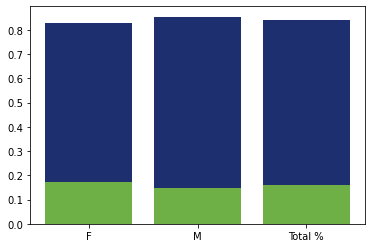

In [193]:
plt.bar(gndr_atr.index, height=gndr_atr['Existing Customer'], color='#1D2F6F')
plt.bar(gndr_atr.index, height=gndr_atr['Attrited Customer'], color = '#6EAF46')
plt.labels = ['F', 'M', 'Total %']
plt.show()

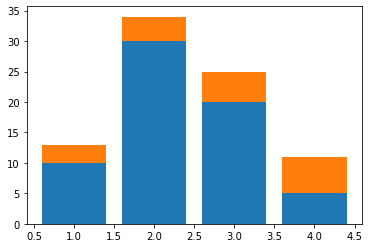

In [179]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()

In [129]:
card_matrix = pd.crosstab(df['Card Category'], df['Acc status'], normalize='all', margins = True, margins_name= 'Total')
card_matrix

Acc status,Attrited Customer,Existing Customer,Total
Card Category,,,
Blue,0.149995,0.781772,0.931767
Gold,0.002074,0.009381,0.011455
Platinum,0.000494,0.001481,0.001975
Silver,0.008097,0.046707,0.054804
Total,0.160660,0.839340,1.000000


In [139]:
income_matrix = pd.crosstab(df['Income Category'], df['Acc status'], margins=True, margins_name='Total',normalize='index')
income_matrix

Acc status,Attrited Customer,Existing Customer
Income Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835
Total,0.160660,0.839340


In [141]:
edu_matrix = pd.crosstab(df['Education'], df['Acc status'], margins=True, margins_name='Total',normalize='index')
edu_matrix

Acc status,Attrited Customer,Existing Customer
Education,,
College,0.152024,0.847976
Doctorate,0.210643,0.789357
Graduate,0.155691,0.844309
High School,0.152012,0.847988
Post-Graduate,0.178295,0.821705
Uneducated,0.159381,0.840619
Unknown,0.168532,0.831468
Total,0.160660,0.839340


In [145]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Age,Dependent count,Months on book,Total Relationship Count,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months on book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total Relationship Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months Inactive 12 mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts Count 12 mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total Revolving Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg Open To Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total Amt Chng Q4 Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


In [56]:
credit_f = df[df['Gender']=='F']['Credit Limit']
credit_m = df[df['Gender']=='M']['Credit Limit']

In [57]:
credit_f.mean(),credit_m.mean()

(5023.8542739828745, 12685.674963304655)

In [58]:
df.groupby(['Gender'])['Credit Limit'].mean()

Gender
F     5023.854274
M    12685.674963
Name: Credit Limit, dtype: float64

In [41]:
churned = df[df['Acc status'] == 'Attrited Customer']
n_churned = df[df['Acc status'] == 'Existing Customer']

In [86]:
churned.groupby('Gender')['Acc status'].count()

Gender
F    930
M    697
Name: Acc status, dtype: int64

In [87]:
n_churned.groupby('Gender')['Acc status'].count()

Gender
F    4428
M    4072
Name: Acc status, dtype: int64